<a href="https://colab.research.google.com/github/UdayChaudhary1/Important-Implementations/blob/main/Implementing_Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [271]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import metrics
import matplotlib.pyplot as plt

In [332]:
# Example dataset
X = np.array([[1], [2], [3], [4], [5], [6],[24.5], [7], [8], [11.5], [15], [13.5], [17.5], [10], [11], [12], [13], [14], [15], [16], [19.5], [21], [17], [18], [19], [20]])
y = np.array([4.2, 16, 6.1,  7.8, 10.5, 12.7, 14.6, 14, 12, 16.2, 18.4, 21.1, 22.8,
     25.4, 27.1, 29.3, 31.2, 33.5, 35.6, 37.2, 39.8, 42.1, 44.5, 37, 23, 26])

In [333]:
print(X.shape)
print(y.shape)

(26, 1)
(26,)


In [297]:
class LinearRegression:
    def __init__(self, learning_rate=0.01, epochs=1000):
        self.learning_rate = learning_rate
        self.epochs = epochs
        self.weights = None
        self.bias = None

    def fit(self, X, y):
        n_samples, n_features = X.shape
        self.weights = np.zeros(n_features)
        self.bias = 0

        # Gradient Descent
        for epoch in range(self.epochs):
            y_predicted = np.dot(X, self.weights) + self.bias

            dw = -(2 / n_samples) * np.dot(X.T, (y - y_predicted))
            db = -(2 / n_samples) * np.sum(y - y_predicted)

            self.weights -= self.learning_rate * dw
            self.bias -= self.learning_rate * db

            # Compute and print the loss every 100 epochs
            if epoch % 100 == 0:
                loss = self.compute_loss(X, y)
                print(f'Epoch {epoch}: Loss = {loss:.4f}')

    def predict(self, X):
        return np.dot(X, self.weights) + self.bias

    def compute_loss(self, X, y):
        n_samples = X.shape[0]
        y_predicted = np.dot(X, self.weights) + self.bias
        loss = (1 / n_samples) * np.sum((y - y_predicted) ** 2)
        return loss

In [334]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=2)

In [335]:
X_test[:, 0]

array([19. ,  1. , 11.5, 19.5, 13. , 17.5])

In [336]:
y_test

array([23. ,  4.2, 16.2, 39.8, 31.2, 22.8])

In [337]:
# Create and train the model
model = LinearRegression(learning_rate=0.001, epochs=11000)
model.fit(X_train, y_train)

Epoch 0: Loss = 326.7221
Epoch 100: Loss = 90.1216
Epoch 200: Loss = 88.9745
Epoch 300: Loss = 87.9195
Epoch 400: Loss = 86.9491
Epoch 500: Loss = 86.0566
Epoch 600: Loss = 85.2357
Epoch 700: Loss = 84.4807
Epoch 800: Loss = 83.7863
Epoch 900: Loss = 83.1476
Epoch 1000: Loss = 82.5602
Epoch 1100: Loss = 82.0199
Epoch 1200: Loss = 81.5230
Epoch 1300: Loss = 81.0660
Epoch 1400: Loss = 80.6456
Epoch 1500: Loss = 80.2589
Epoch 1600: Loss = 79.9033
Epoch 1700: Loss = 79.5763
Epoch 1800: Loss = 79.2754
Epoch 1900: Loss = 78.9988
Epoch 2000: Loss = 78.7443
Epoch 2100: Loss = 78.5102
Epoch 2200: Loss = 78.2950
Epoch 2300: Loss = 78.0970
Epoch 2400: Loss = 77.9148
Epoch 2500: Loss = 77.7474
Epoch 2600: Loss = 77.5933
Epoch 2700: Loss = 77.4516
Epoch 2800: Loss = 77.3213
Epoch 2900: Loss = 77.2014
Epoch 3000: Loss = 77.0912
Epoch 3100: Loss = 76.9898
Epoch 3200: Loss = 76.8965
Epoch 3300: Loss = 76.8108
Epoch 3400: Loss = 76.7319
Epoch 3500: Loss = 76.6593
Epoch 3600: Loss = 76.5926
Epoch 3700: 

In [338]:
# Predictions and Metrics
training_data_prediction = model.predict(X_train)
test_data_prediction = model.predict(X_test)

In [339]:
# Calculate metrics
training_r2 = metrics.r2_score(y_train, training_data_prediction)
training_mae = metrics.mean_absolute_error(y_train, training_data_prediction)
test_r2 = metrics.r2_score(y_test, test_data_prediction)
test_mae = metrics.mean_absolute_error(y_test, test_data_prediction)

In [340]:
print("Training R Squared Error: ", training_r2)
print("Training Mean Absolute Error: ", training_mae)
print("Test R Squared Error: ", test_r2)
print("Test Mean Absolute Error: ", test_mae)

Training R Squared Error:  0.4350268825385605
Training Mean Absolute Error:  7.379136646778726
Test R Squared Error:  0.5919472925292217
Test Mean Absolute Error:  7.063070801932912


In [341]:
#Accuracy in predicting testing data
test_data_prediction = model.predict(X_test)

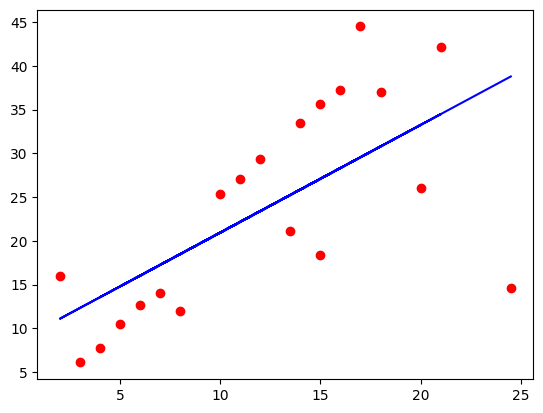

In [342]:
plt.scatter(X_train, y_train, color = 'red')
plt.plot(X_train, training_data_prediction, color='blue')
plt.show()

In [343]:
# Make predictions
predictions = model.predict(X)
print("Predicted values:", predictions)

Predicted values: [ 9.86753953 11.0981151  12.32869067 13.55926624 14.78984181 16.02041738
 38.7860654  17.25099294 18.48156851 22.788583   27.0955975  25.24973414
 30.17203642 20.94271965 22.17329522 23.40387079 24.63444636 25.86502193
 27.0955975  28.32617306 32.63318755 34.47905091 29.55674863 30.7873242
 32.01789977 33.24847534]
